In [43]:
from dateutil.relativedelta import relativedelta
from utils import get_csv
import matplotlib.pyplot as plt
import pandas as pd


In [56]:
df = get_csv()
df.index.dtype

dtype('<M8[ns]')

In [45]:
july_index = df.index.get_loc('2020-07-01')

In [46]:
july_index = df.index.get_loc('2020-07-01')
states_list = df.columns

In [47]:
states_past_covid = []
for state in states_list:
    pre_cov_pov = df[state].loc['2020-01-01']
    states_past_covid.append(df[july_index:][state][df[state][july_index:] <= pre_cov_pov].sort_index().head(1))

In [48]:
df_months_recovered = pd.DataFrame(states_past_covid)

In [49]:
# Fill NaN values with -1
df_months_recovered = df_months_recovered.fillna(-1)

# Quarter for COVID over which we measure recovery time
april_2020 = pd.Timestamp('2020-04-01')

# Initialize Dict that will creat recovery df
recovered_dictionary = {}

In [50]:
for state in states_list:
    # Create Boolean Mask for Final Recovery Data Frame
    mask = df_months_recovered.loc[state] != -1
    
    if mask.any():
        first_non_nan_date = df_months_recovered.loc[state][df_months_recovered.loc[state] != -1].index[0]
        diff = relativedelta(first_non_nan_date, april_2020)
        months_diff = diff.years * 12 + diff.months
        recovered_dictionary[state] = months_diff
    else:
        recovered_dictionary[state] = -1

In [51]:
recovered_dictionary
recovered_df = pd.DataFrame(recovered_dictionary.values(), index = recovered_dictionary.keys())
recovered_df.rename(columns = {0:'Months since 2020-04-01'},inplace = True)
recovered_df = recovered_df.sort_values('Months since 2020-04-01', ascending = False)
recovered_df

,Months since 2020-04-01
Sinaloa,33
México,33
Yucatán,31
Quintana Roo,31
Coahuila de Zaragoza,27
Chihuahua,24
Jalisco,24
Baja California,21
Sonora,19
Baja California Sur,19


In [52]:
recovered_df.value_counts().sort_index()

Months since 2020-04-01
-1                         14
 3                          1
 7                          1
 9                          1
 12                         5
 15                         1
 19                         2
 21                         1
 24                         2
 27                         1
 31                         2
 33                         2
dtype: int64

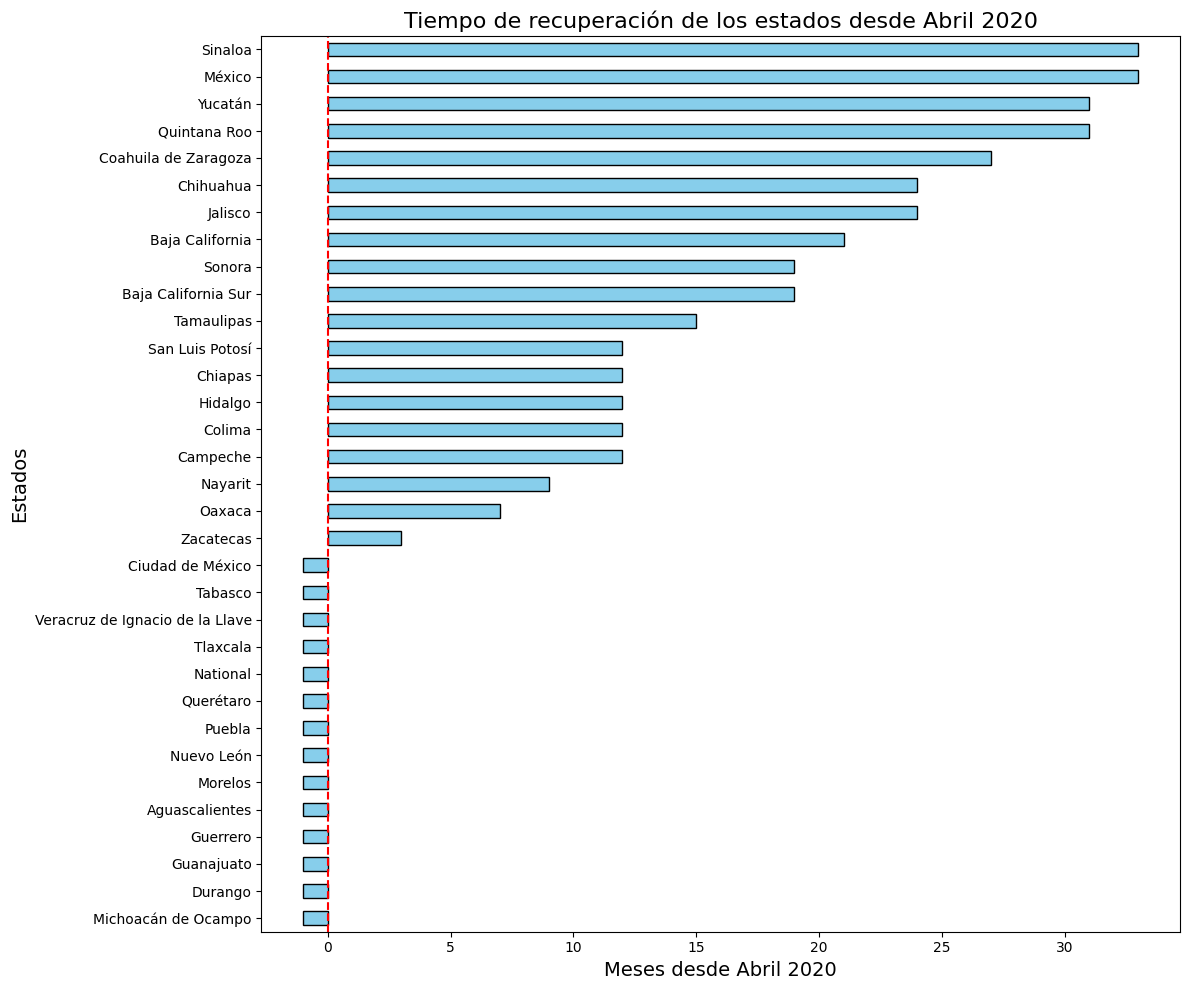

In [53]:
# Extraer los datos necesarios para la visualización con estados
state_recovery_data = recovered_df.sort_values('Months since 2020-04-01')

# Crear un gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 10))
state_recovery_data.plot(kind='barh', ax=ax, color='skyblue', edgecolor='black', legend=False)

# Añadir títulos y etiquetas
ax.set_title('Tiempo de recuperación de los estados desde Abril 2020', fontsize=16)
ax.set_xlabel('Meses desde Abril 2020', fontsize=14)
ax.set_ylabel('Estados', fontsize=14)
ax.axvline(0, color='red', linestyle='--')  # Línea vertical para indicar el punto de inicio (abril 2020)

# Mostrar el gráfico
plt.tight_layout()
plt.show()